<a href="https://colab.research.google.com/github/financieras/ai/blob/main/perceptron/test/perceptron_media_luna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conjunto de dos medias lunas
Conjunto no linealmente separable

(200, 2) (200,)


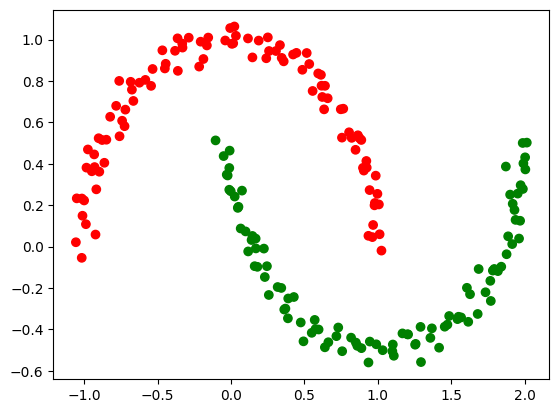

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_moons
np.random.seed()
data, labels = make_moons(n_samples=200,noise = 0.04,random_state=0)
print(data.shape, labels.shape)
color_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=color_map)
plt.show()

(200, 2) (200,)


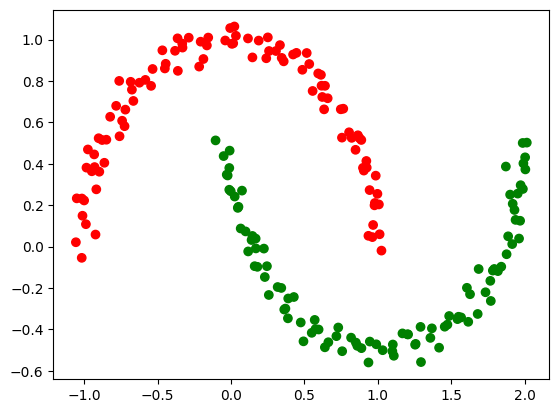

200


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.datasets import make_moons
np.random.seed()
data, labels = make_moons(n_samples=200, noise=0.04, random_state=0)
print(data.shape, labels.shape)
color_map = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=color_map)
plt.show()

class FeedForwardNetwork_Vectorised:
    def __init__(self):
        np.random.seed(0)
        self.W1 = np.random.randn(2,2)
        self.W2 = np.random.randn(2,1)
        self.B1 = np.zeros((1,2))
        self.B2 = np.zeros((1,1))

    def sigmoid(self, X):
        return 1.0/(1.0 + np.exp(-X))

    def forward_pass(self, X):
        self.A1 = np.matmul(X, self.W1) + self.B1
        self.H1 = self.sigmoid(self.A1)
        self.A2 = np.matmul(self.H1, self.W2) + self.B2
        self.H2 = self.sigmoid(self.A2)
        return self.H2

# Crea la variable X_train a partir de los datos generados
X_train = data

ffn_v = FeedForwardNetwork_Vectorised()
#print(ffn_v.forward_pass(X_train))     # permite calcular el vector que logra el forward propagation
print(len(ffn_v.forward_pass(X_train))) # es un vector de 200 valores

## Resolución completa

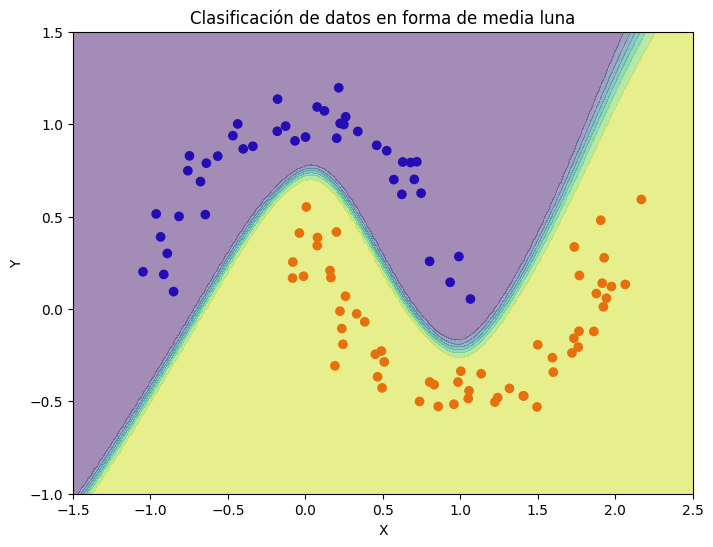

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generar los datos en forma de media luna
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la clase de la red neuronal
class FeedForwardNetwork:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Inicializar los pesos y sesgos de manera aleatoria
        self.W1 = np.random.randn(self.input_size, self.hidden_sizes[0])
        self.b1 = np.zeros(self.hidden_sizes[0])
        self.W2 = np.random.randn(self.hidden_sizes[0], self.hidden_sizes[1])
        self.b2 = np.zeros(self.hidden_sizes[1])
        self.W3 = np.random.randn(self.hidden_sizes[1], self.output_size)
        self.b3 = np.zeros(self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Calcular las activaciones de la primera capa oculta
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Calcular las activaciones de la segunda capa oculta
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        # Calcular las activaciones de la capa de salida
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        return self.a3

# Crear la red neuronal, con dos capas ocultas de 10 y 5 neuronas cada una respectivamente
nn = FeedForwardNetwork(input_size=2, hidden_sizes=[10, 5], output_size=1)

# Entrenar la red neuronal
epochs = 10000
learning_rate = 0.01

for epoch in range(epochs):
    # Realizar la propagación hacia adelante
    y_pred = nn.forward(X_train)

    # Calcular el error y actualizar los pesos
    error = y_train.reshape(-1, 1) - y_pred
    nn.W3 += learning_rate * np.dot(nn.a2.T, error)
    nn.b3 += learning_rate * np.sum(error, axis=0)
    delta2 = np.dot(error, nn.W3.T) * nn.a2 * (1 - nn.a2)
    nn.W2 += learning_rate * np.dot(nn.a1.T, delta2)
    nn.b2 += learning_rate * np.sum(delta2, axis=0)
    delta1 = np.dot(delta2, nn.W2.T) * nn.a1 * (1 - nn.a1)
    nn.W1 += learning_rate * np.dot(X_train.T, delta1)
    nn.b1 += learning_rate * np.sum(delta1, axis=0)

# Realizar predicciones en el conjunto de prueba
y_pred = (nn.forward(X_test) > 0.5).astype(int)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
cmap = matplotlib.colors.ListedColormap(['blue', 'red'])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap)
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = nn.forward(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.5)
plt.title('Clasificación de datos en forma de media luna')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()